In [1]:
#importing all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

from sklearn import model_selection as mdsel
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#loading the dataset
calls=pd.read_csv('train_dataset.csv')
calls.head() #to get a look at our dataset

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus
0,1.0,0.119781,0.295089,0.329479,0.179924,0.178956,0.127519,-0.132204,-0.063171,0.097205,...,-0.017131,-0.125876,0.028727,0.117710,0.038340,0.022927,0.013547,-0.057234,-0.020226,Hypsiboas
1,1.0,0.653562,0.924797,0.375699,0.298197,-0.032417,0.020878,0.003379,0.205143,0.078281,...,-0.043285,0.023934,0.083198,0.061530,-0.005929,0.001438,0.084545,0.087731,0.027106,Hypsiboas
2,1.0,0.060299,0.324429,0.411001,0.209832,0.185888,0.114315,-0.162366,-0.049923,0.103734,...,-0.005294,-0.089390,-0.002942,0.095505,0.032248,0.026255,0.011327,-0.073650,-0.027495,Hypsiboas
3,1.0,0.318058,0.802882,0.322736,-0.314240,0.347878,0.337821,-0.189927,-0.019588,0.204428,...,0.098808,-0.123705,-0.036430,0.082222,-0.005785,-0.041194,0.021666,0.092925,-0.000002,Leptodactylus
4,1.0,0.470661,0.301141,0.384953,0.063172,0.029145,0.140112,0.021464,-0.170095,-0.010733,...,0.104809,0.110101,-0.148516,-0.121830,0.128067,0.076941,-0.019640,-0.017236,-0.015215,Ameerega


In [3]:
#getting the shape of the dataset
calls.shape

(1676, 23)

In [4]:
#let us get a statistical analysis of the data
calls.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,0.986229,0.324950,0.347724,0.385029,0.106248,0.139614,0.040386,-0.023867,0.078227,0.059941,...,0.082730,0.002130,-0.035238,0.008040,0.028524,0.011529,-0.013808,-0.018478,0.017621,0.031685
std,0.082463,0.238597,0.301678,0.160415,0.184099,0.128277,0.171155,0.131537,0.168221,0.146964,...,0.193987,0.155280,0.176168,0.115847,0.137273,0.078171,0.081785,0.091232,0.077361,0.116135
min,-0.251179,-0.591520,-0.397932,-0.162617,-0.434950,-0.346075,-0.452555,-0.576506,-0.454282,-0.497360,...,-0.606490,-0.421427,-0.438884,-0.461007,-0.405825,-0.475986,-0.471597,-0.326972,-0.229310,-0.350161
25%,1.000000,0.169652,0.141529,0.280972,-0.004733,0.044786,-0.093328,-0.125582,-0.043273,-0.001168,...,-0.052157,-0.092763,-0.165590,-0.064875,-0.090990,-0.029581,-0.064427,-0.075232,-0.034770,-0.038119
50%,1.000000,0.305196,0.319707,0.376827,0.134128,0.142072,0.035249,-0.022280,0.094330,0.073603,...,0.074095,-0.017139,-0.048642,0.015390,0.034173,0.011834,-0.006237,-0.016632,0.007412,0.019257
75%,1.000000,0.471846,0.545007,0.505353,0.217547,0.219395,0.121465,0.061985,0.210756,0.137862,...,0.235666,0.103171,0.110211,0.070823,0.126740,0.056077,0.031336,0.031510,0.064155,0.116609
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,0.664746,0.520603,0.738033,0.478224,...,0.751285,0.566873,0.661947,0.427408,0.432527,0.614064,0.388499,0.467831,0.294569,0.293917


In [5]:
#lets check for null values and also the datatype of each column
calls.info()
#all are non null columns :D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  1676 non-null   float64
 1   MFCCs_ 2  1676 non-null   float64
 2   MFCCs_ 3  1676 non-null   float64
 3   MFCCs_ 4  1676 non-null   float64
 4   MFCCs_ 5  1676 non-null   float64
 5   MFCCs_ 6  1676 non-null   float64
 6   MFCCs_ 7  1676 non-null   float64
 7   MFCCs_ 8  1676 non-null   float64
 8   MFCCs_ 9  1676 non-null   float64
 9   MFCCs_10  1676 non-null   float64
 10  MFCCs_11  1676 non-null   float64
 11  MFCCs_12  1676 non-null   float64
 12  MFCCs_13  1676 non-null   float64
 13  MFCCs_14  1676 non-null   float64
 14  MFCCs_15  1676 non-null   float64
 15  MFCCs_16  1676 non-null   float64
 16  MFCCs_17  1676 non-null   float64
 17  MFCCs_18  1676 non-null   float64
 18  MFCCs_19  1676 non-null   float64
 19  MFCCs_20  1676 non-null   float64
 20  MFCCs_21  1676 non-null   floa

In [6]:
#let us group our data according to the occurence of a specific genus
calls.groupby('Genus').size()
#this tells us about the number of records we have for each genus

Genus
Adenomera        450
Ameerega         271
Dendropsophus    155
Hypsiboas        500
Leptodactylus    135
Osteocephalus     57
Rhinella          34
Scinax            74
dtype: int64

In [7]:
#splitting the given data into train and test sets
calls_train,calls_test=mdsel.train_test_split(calls,test_size=0.25)
calls_train.shape

(1257, 23)

In [8]:
#we must reset indices of both the train and test cases so that we have no trouble while comparison
calls_train=calls_train.reset_index(drop=True)
calls_test=calls_test.reset_index(drop=True)

In [9]:
calls_test.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus
0,1.0,0.233945,0.182857,0.439322,0.316679,-0.004881,-0.125144,0.103780,0.192164,-0.020178,...,-0.071216,-0.098796,0.080906,0.129897,-0.028761,-0.131825,-0.054427,0.112319,0.127061,Dendropsophus
1,1.0,0.108329,0.178004,0.502183,0.069912,-0.068796,-0.124019,0.070708,0.327129,0.095681,...,-0.167342,-0.162867,0.142632,0.132835,0.001522,-0.041845,-0.079638,0.041076,0.073257,Adenomera
2,1.0,0.423610,0.765729,0.174338,-0.174805,0.325625,0.168072,-0.212809,0.118570,0.228955,...,0.124347,-0.034499,0.005199,0.109027,-0.050190,-0.005267,0.060400,-0.004034,-0.054222,Leptodactylus
3,1.0,0.375734,0.188926,0.336739,0.142579,0.121246,0.202317,0.035160,-0.133665,-0.016957,...,0.096533,0.126136,-0.126802,-0.125340,0.070877,0.065248,-0.026469,-0.016488,-0.029568,Ameerega
4,1.0,0.511366,0.440746,0.285071,0.098744,0.182904,0.013630,-0.071603,0.082246,0.053448,...,-0.042870,-0.072742,0.068359,0.049968,-0.037866,-0.039883,-0.035339,-0.012683,0.109343,Hypsiboas


In [41]:
#applying Variance Threshold method to the data
#Here we filter out those features which have variance less than 0.2
#This means that they have very less affect on our target variable and are more or less same
#we won't use these features to train our model
#we will also remove them from the test dataset
calls_features=calls.drop('Genus',axis=1)
calls_var=VarianceThreshold(threshold=0.03)
calls_var.fit_transform(calls_features)
for feature in zip(calls_features.columns,calls_var.variances_):
    print(feature)

('MFCCs_ 1', 0.006796070211846671)
('MFCCs_ 2', 0.056894449607937526)
('MFCCs_ 3', 0.09095533926110276)
('MFCCs_ 4', 0.02571762154517421)
('MFCCs_ 5', 0.03387211114448845)
('MFCCs_ 6', 0.016445092007061436)
('MFCCs_ 7', 0.02927657522673265)
('MFCCs_ 8', 0.017291706685114143)
('MFCCs_ 9', 0.028281535853673854)
('MFCCs_10', 0.021585508251920748)
('MFCCs_11', 0.02725714577362327)
('MFCCs_12', 0.02813492468502747)
('MFCCs_13', 0.037608604376196154)
('MFCCs_14', 0.024097427376234947)
('MFCCs_15', 0.031016675440549205)
('MFCCs_16', 0.013412565387651407)
('MFCCs_17', 0.018832671408755615)
('MFCCs_18', 0.006106996050661659)
('MFCCs_19', 0.006684718389786361)
('MFCCs_20', 0.008318271907753373)
('MFCCs_21', 0.00598119220133187)
('MFCCs_22', 0.013479238165791253)


In [52]:
#hence, selecting the required columns only
features=['MFCCs_ 2','MFCCs_ 3','MFCCs_ 4','MFCCs_ 5','MFCCs_ 7','MFCCs_ 9','MFCCs_10','MFCCs_11','MFCCs_12','MFCCs_13','MFCCs_14','MFCCs_15']
calls_train_features=calls_train[features]
calls_test_features=calls_test[features]

calls_train_label=calls_train['Genus']
calls_test_label=calls_test['Genus']
calls_test_features.shape

(419, 12)

In [93]:
#employing a decision tree model with max depth of 10
dt=DecisionTreeClassifier(max_depth=10)
#fitting the model on the training data
dt.fit(calls_train_features,calls_train_label)

DecisionTreeClassifier(max_depth=10)

In [94]:
#predicting target variable using our test features
predictions=dt.predict(calls_test_features)

calls_pred_label=pd.DataFrame(predictions.reshape(len(predictions),1))
calls_pred_label.rename(columns={0:'Predictions'},inplace=True)
calls_pred_label.head()

,Predictions
0,Dendropsophus
1,Hypsiboas
2,Leptodactylus
3,Ameerega
4,Hypsiboas


In [95]:
#comparison between predicted and actual values
calls_test_pred=pd.concat([calls_test_label,calls_pred_label],axis=1)
calls_test_pred.head(20)

,Genus,Predictions
0,Dendropsophus,Dendropsophus
1,Adenomera,Hypsiboas
2,Leptodactylus,Leptodactylus
3,Ameerega,Ameerega
4,Hypsiboas,Hypsiboas
5,Hypsiboas,Hypsiboas
6,Adenomera,Adenomera
7,Rhinella,Rhinella
8,Hypsiboas,Hypsiboas
9,Ameerega,Ameerega


In [96]:
#getting the accuracy of our model
print(accuracy_score(calls_test_label,calls_pred_label)*100)
# It is 91.65%

91.64677804295943


<IPython.core.display.Javascript object>


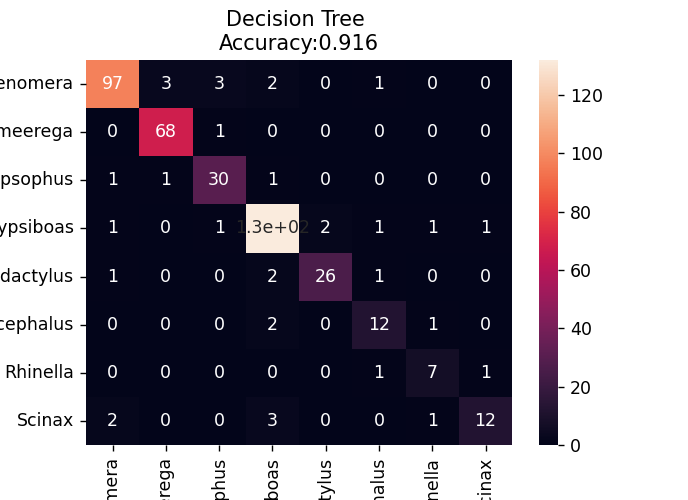

In [97]:
#printing out and displaying the confusion matrix to see where did our model falter
cm=confusion_matrix(calls_test_label,calls_pred_label)

cm_df=pd.DataFrame(cm,index=['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas', 'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax'],columns=['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas', 'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(calls_test_label, calls_pred_label)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#The model faltered at some places
#but the predictions are still pretty good
#Now, testing on blind test cases

In [98]:
#Loading the test dataset for which model will be evaluated
tests=pd.read_csv('test_dataset.csv')
tests.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.315318,0.497602,0.348497,-0.227228,0.287298,0.417227,-0.111509,-0.155905,0.155239,...,0.157684,0.180256,-0.069517,-0.131330,0.072044,0.037927,-0.031580,0.040856,0.142173,-0.025470
1,1.0,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
2,1.0,0.415183,0.335966,0.475031,0.090405,0.005044,-0.039698,0.084663,0.240898,-0.051561,...,0.380234,-0.107244,-0.230384,0.138169,0.173223,-0.079970,-0.115304,-0.044019,0.123564,0.165076
3,1.0,0.338689,-0.064142,-0.041990,-0.033732,0.269438,0.497481,0.205565,-0.204474,-0.243321,...,0.129518,0.341234,0.147532,-0.208999,-0.193580,-0.021241,-0.027304,0.007022,0.152431,0.128729
4,1.0,0.703540,0.613362,0.410972,-0.031303,0.159498,0.210965,-0.082156,-0.004225,0.156324,...,0.180426,0.088834,-0.091483,0.028710,0.138252,0.011317,-0.025057,0.133431,0.018059,-0.074689


In [100]:
#selecting only required features
tests_features=tests[features]
tests_features.shape

(1676, 12)

In [101]:
#making predictions
actual_pred=dt.predict(tests_features)
actual_pred

array(['Adenomera', 'Hypsiboas', 'Adenomera', ..., 'Ameerega',
       'Hypsiboas', 'Dendropsophus'], dtype=object)

In [102]:
#converting the array to an appropriate dataframe
predictions_df=pd.DataFrame(actual_pred)
predictions_df.index=tests.index
predictions_df.columns=['Genus']
predictions_df.head()


,Genus
0,Adenomera
1,Hypsiboas
2,Adenomera
3,Ameerega
4,Hypsiboas


In [103]:
#saving the predictions dataframe as a csv file to be uploaded
predictions_df.to_csv("prediction_results.csv", index = False)